In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2


In [8]:
df = pd.read_csv('bankloan.csv')
df = df.dropna()
df.isna().any()
df = df.drop('Loan_ID', axis=1)
df['LoanAmount'] = (df['LoanAmount']*1000).astype(int)
Counter(df['Loan_Status'])#['Y']/df['Loan_Status'].size

Counter({'N': 148, 'Y': 332})

In [10]:
pre_x = df.drop('Loan_Status', axis = 1)
pre_y = df['Loan_Status']
dm_x = pd.get_dummies(pre_x)
dm_y = pre_y.map(dict(Y=1, N=0))
ohe_col=dm_x.columns
joblib.dump(ohe_col, 'ohe_col.pkl')
ohe_col

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [6]:
smote = SMOTE(sampling_strategy= 'minority')
x1, y = smote.fit_resample(dm_x, dm_y)
sc = MinMaxScaler()
x=sc.fit_transform(x1)
#joblib.dump(sc, 'scaler.pkl')


['scaler.pkl']

In [50]:
Counter(y)

Counter({0: 332, 1: 332})

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)
x_train

array([[0.        , 0.03030303, 0.05647664, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.0363389 , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.04045764, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.11048856, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.0462214 , 0.07887815, ..., 0.        , 1.        ,
        0.        ],
       [0.66666667, 0.03915894, 0.10343707, ..., 0.        , 0.        ,
        1.        ]])

In [52]:

Classification = Sequential()
Classification.add(Dense(400, activation = 'relu', kernel_initializer='random_normal', input_dim= x_test.shape[1]))
Classification.add(Dropout(0.2))
Classification.add(Dense(800, activation='relu', kernel_initializer='random_normal', kernel_regularizer=l2(0.01)))
Classification.add(Dropout(0.2))
Classification.add(Dense(800, activation='relu', kernel_initializer='random_normal', kernel_regularizer=l2(0.01)))
Classification.add(Dropout(0.2))
Classification.add(Dense(10, activation='relu', kernel_initializer= 'random_normal'))
Classification.add(Dense(1, activation= 'sigmoid', kernel_initializer='random_normal'))

Classification.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Classification.fit(x_train, y_train, batch_size=24, epochs=100, verbose=0)

eval=Classification.evaluate(x_train, y_train)
eval

17/17 [==============================] - 0s 6ms/step - loss: 0.3198 - accuracy: 0.8851


[0.31977543234825134, 0.8851224184036255]

In [53]:
eval_test= Classification.evaluate(x_test,y_test)
y_pred=Classification.predict(x_test)
y_pred=(y_pred>0.52)
eval_test

5/5 [==============================] - 0s 3ms/step


[0.4566348195075989, 0.8496240377426147]

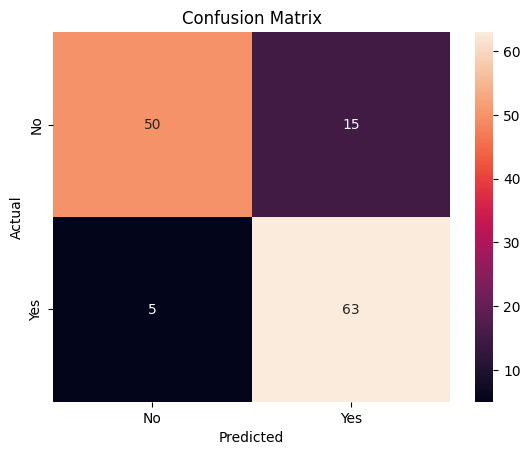

In [54]:
cm = confusion_matrix(y_test,y_pred)
ax=plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted'); ax.set_ylabel('Actual');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No','Yes']); ax.yaxis.set_ticklabels(['No','Yes']);

In [1]:
import pickle
import joblib
file_name='loan_model.pkl'
joblib.dump(Classification,file_name)

NameError: name 'Classification' is not defined

In [ ]:
mdl = joblib.load(file_name)